# Project Objective

Amidst various categories of prices, asset prices stand out as a focal point of interest for many. Asset prices, encompassing real estate and stock prices, hold significant sway over individuals' financial well-being. The fluctuations in these prices can evoke happiness or concern, influencing crucial decisions.

Within the realm of asset prices, real estate prices have notably shown an upward trajectory over time. The common notion of "Buy now, it's the cheapest time" stems from this observation. However, the exact extent of this upward trend remains uncertain. Predicting house prices accurately can empower homebuyers to make informed decisions, moving beyond timing based solely on perceptions of affordability.

Hence, the primary objective of this project is to craft a predictive model leveraging 79 variables, including one alphanumeric and a target feature (price). This model aims to estimate house prices, offering prospective homebuyers insights into potential fluctuations and assisting them in making well-informed purchase decisions.

# Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import category_encoders as ce

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', None)

# Data Acquisition

#### Preventing Data Leakeage

**<font color='yellowgreen'>What is a Data Leakeage?</font>**

Data leakage occurs when external information that is not part of the training dataset is introduced to the predictive model, which cannot realistically happen in practice. In the real world, we don't possess a test dataset like the ones provided in Kaggle competitions, and we are unaware of the characteristics of the test dataset. In essence, data leakage transpires when test data, or external information, infiltrates the model and artificially inflates its performance, leading to overly optimistic results.

Data leakage is a common issue, particularly in machine learning competitions such as Kaggle. Many top-performing models are prone to overfitting and exploit leaked information from the test dataset to achieve higher scores.

When the model's predictions seem "too good to be true," it is advisable to validate the model's performance through techniques like cross-validation folds or by withholding a separate validation dataset to assess the final scores of the model.

In this notebook, we adopt the second approach, a simpler method, to prevent data leakage. We isolate the original train dataset from Kaggle's House Price competition and randomly divide it into train and test datasets. This approach allows us to conduct exploratory data analysis (EDA) and model development while cross-validating the model's performance in a more generalizable manner. It's important to note that using this method in Kaggle competitions may not yield the highest scores, but it provides a model suitable for real-world implementation.

In [2]:
# Split the dataset into train and test for validation

houseprice = pd.read_csv(r"C:\Users\nene0\Documents\Datasets\house-prices-advanced-regression-techniques\train.csv")

train, validation = train_test_split(houseprice, test_size=0.2, random_state=42)

In [3]:
# Save test dataset and reset train dataset's index.

validation.to_csv("house_price_validation.csv", index=False)
train.reset_index(drop=True, inplace=True)

# Data Analysis

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1957,1957,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,Gd,CBlock,TA,TA,No,Rec,922,Unf,0,392,1314,GasA,TA,Y,SBrkr,1314,0,0,1314,1,0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1957.0,RFn,1,294,TA,TA,Y,250,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,145000
1,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,7,1993,1994,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,799,799,GasA,Gd,Y,SBrkr,799,772,0,1571,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,RFn,2,380,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,178000
2,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,5,7,1910,1950,Gable,CompShg,MetalSd,Wd Sdng,NaN,0.0,TA,TA,CBlock,Fa,TA,No,Unf,0,Unf,0,796,796,GasA,Gd,Y,FuseA,796,0,0,796,0,0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,P,328,0,164,0,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,85000
3,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,5,7,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,252.0,TA,TA,BrkTil,Gd,TA,No,ALQ,569,Unf,0,162,731,GasA,Ex,Y,SBrkr,981,787,0,1768,1,0,1,1,3,1,Gd,7,Typ,2,TA,Detchd,1939.0,Unf,1,240,TA,TA,Y,0,0,264,0,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,175000
4,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,6,1924,1950,Gable,CompShg,BrkFace,Wd Sdng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,LwQ,218,Unf,0,808,1026,GasA,TA,Y,SBrkr,1026,665,0,1691,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Detchd,1924.0,Unf,1,308,TA,TA,Y,0,0,242,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,127000


In [5]:
train.shape

(1168, 81)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    951 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          74 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,951.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1162.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1104.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,730.904966,56.849315,70.343849,10689.642123,6.121575,5.584760,1970.965753,1984.897260,103.771945,446.023973,45.152397,570.595034,1061.771404,1169.354452,352.351027,5.696062,1527.401541,0.425514,0.057363,1.577055,0.381849,2.890411,1.047945,6.561644,0.618151,1978.662138,1.781678,476.273973,95.946918,49.578767,21.839041,3.812500,15.407534,2.955479,51.267123,6.356164,2007.818493,181441.541952
std,425.369088,42.531862,24.897021,10759.366198,1.367619,1.116062,30.675495,20.733955,173.032238,459.070977,158.217499,446.364551,440.676330,386.675268,439.570872,47.887106,524.432686,0.519969,0.236289,0.546912,0.499953,0.804855,0.225448,1.619706,0.645129,24.728938,0.740161,211.095373,129.685939,69.433580,62.083227,31.519664,55.881148,41.648504,553.039684,2.670707,1.322639,77263.583862
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.750000,20.000000,59.000000,7587.250000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,0.000000,222.500000,796.000000,888.000000,0.000000,0.000000,1145.750000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.750000,1.000000,341.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,732.500000,50.000000,70.000000,9600.000000,6.000000,5.000000,1972.000000,1994.000000,0.000000,384.500000,0.000000,480.000000,997.500000,1095.000000,0.000000,0.000000,1473.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,482.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165000.000000
75%,1101.750000,70.000000,80.000000,11700.000000,7.000000,6.000000,2001.000000,2004.000000,166.000000,721.000000,0.000000,810.250000,1299.250000,1396.750000,728.000000,0.000000,1792.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214925.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,5644.000000,1127.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,745000.000000


From the initial examination of the dataset using the describe method is that standard deviation of most features are within 600 except for two features; `LotArea` and `SalePrice` (exclude `Id` feature as id represents the unique number assigned to the houses instead of describing the house itself.). <font color='yellow'>The standard deviation of the `LotArea` is 10,759 and `SalePrice` is 77,263</font>. This indicates the data points of the features are spread out in a wider range from the average. Later we will going to check the distribution of these features and transform the values if necessary.

In [8]:
train.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1168,1168,74,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,485,1168,1168,1168,1140,1140,1140,1140,1140,1168,1168,1168,1167,1168,1168,621,1104,1104,1104,1104,1168,6,233,46,1168,1168
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,7,15,16,3,4,5,6,4,4,4,6,6,6,5,2,4,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,924,1164,44,729,1059,1167,822,1108,181,1004,1157,978,577,906,1149,420,410,366,727,1018,520,521,1045,769,345,1009,1140,583,1085,1071,589,1084,305,693,480,1050,1061,1070,2,128,41,1012,964


There are significant amount of values missing in the `Alley`, `PoolQC`, and `MiscFeature` features. Most of the object features are having less than ten unique values except `Neighborhood`. 

In [9]:
# Check if there is any duplicated IDs in the Id column and drop if there is no duplication as we will not use this feature for prediction.

train['Id'].duplicated().sum()

0

In [10]:
train.drop(columns='Id', inplace=True)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1957,1957,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,Gd,CBlock,TA,TA,No,Rec,922,Unf,0,392,1314,GasA,TA,Y,SBrkr,1314,0,0,1314,1,0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1957.0,RFn,1,294,TA,TA,Y,250,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,145000
1,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,7,1993,1994,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,799,799,GasA,Gd,Y,SBrkr,799,772,0,1571,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,RFn,2,380,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,178000
2,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,5,7,1910,1950,Gable,CompShg,MetalSd,Wd Sdng,NaN,0.0,TA,TA,CBlock,Fa,TA,No,Unf,0,Unf,0,796,796,GasA,Gd,Y,FuseA,796,0,0,796,0,0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,P,328,0,164,0,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,85000
3,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,5,7,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,252.0,TA,TA,BrkTil,Gd,TA,No,ALQ,569,Unf,0,162,731,GasA,Ex,Y,SBrkr,981,787,0,1768,1,0,1,1,3,1,Gd,7,Typ,2,TA,Detchd,1939.0,Unf,1,240,TA,TA,Y,0,0,264,0,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,175000
4,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,6,1924,1950,Gable,CompShg,BrkFace,Wd Sdng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,LwQ,218,Unf,0,808,1026,GasA,TA,Y,SBrkr,1026,665,0,1691,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Detchd,1924.0,Unf,1,308,TA,TA,Y,0,0,242,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,127000


## Data Visualization

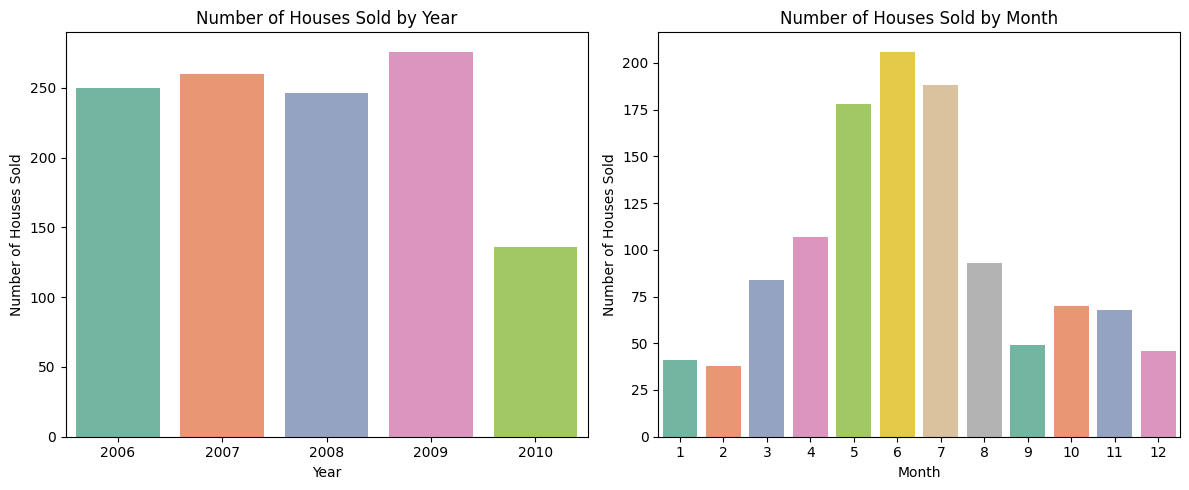

In [11]:
# Plot the time when the houses were sold.

fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.countplot(data=train, x='YrSold', palette='Set2', ax=axes[0])
axes[0].set_title("Number of Houses Sold by Year")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Number of Houses Sold")

sns.countplot(data=train, x='MoSold', palette='Set2', ax=axes[1])
axes[1].set_title("Number of Houses Sold by Month")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Number of Houses Sold")

plt.tight_layout()
plt.show()

Based on the graph depicted above, the volume of houses sold remained relatively consistent throughout the years, with the exception of the year 2010. The highest number of houses were typically sold during the months of **<font color='lightgreen'>May**, **June</font>**, and **<font color='lightgreen'>July</font>**, coinciding with the start of the summer break in the U.S. However, come August, there is a significant drop in the number of houses sold, reducing to nearly half of the July figures.

In contrast to the summer months, the winter season sees a decline in house sales, with fewer properties changing hands during the winter break. This phenomenon could be attributed to the holiday season, which tends to be concentrated in the winter months.

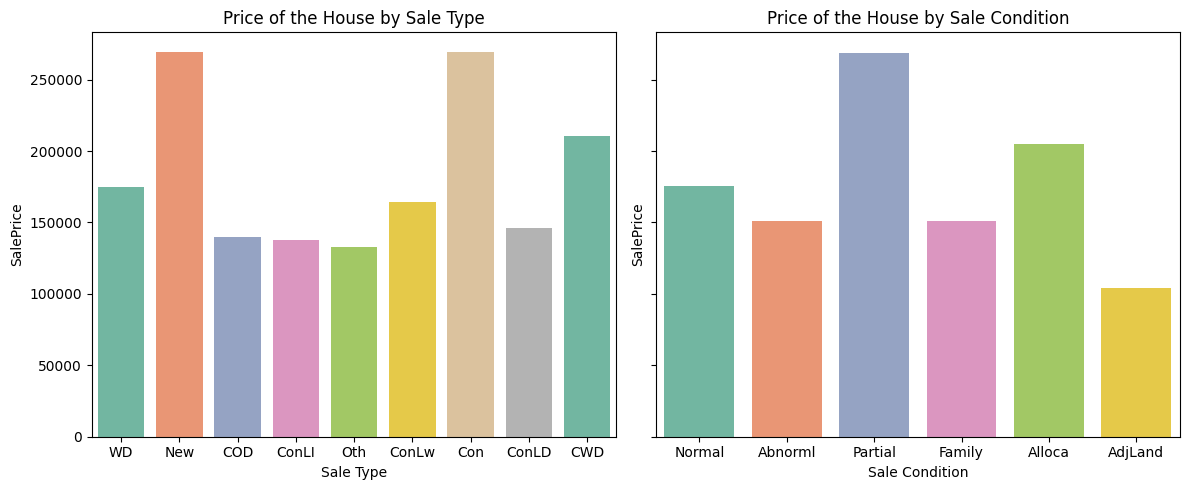

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)

sns.barplot(data=train, x='SaleType', y='SalePrice', palette='Set2', ax=axes[0], errorbar=None)
axes[0].set_title("Price of the House by Sale Type")
axes[0].set_xlabel("Sale Type")
axes[0].set_ylabel("SalePrice")

sns.barplot(data=train, x='SaleCondition', y='SalePrice', palette='Set2', ax=axes[1], errorbar=None)
axes[1].set_title("Price of the House by Sale Condition")
axes[1].set_xlabel("Sale Condition")

plt.tight_layout()
plt.show()

Sales prices tend to be higher when transactions are conducted in full cash. This is likely because it is uncommon for individuals to have a significant amount of cash readily available, so those who purchase homes with cash often have substantial financial resources.

The next highest sales prices are associated with newly built houses. This sales type also appears to be linked to the partial sale condition, as indicated by the data dictionary.

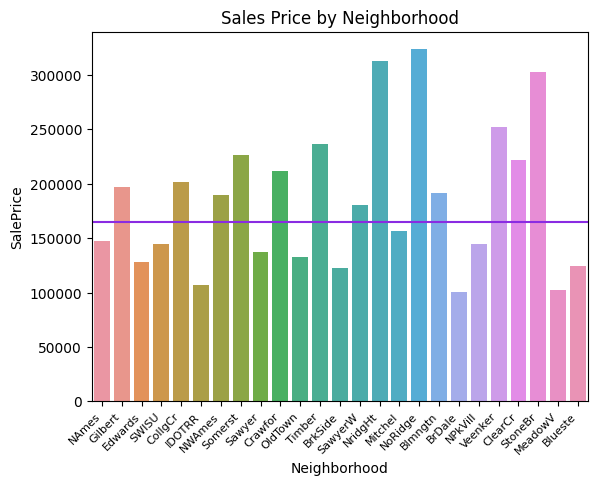

In [13]:
sns.barplot(data=train, x='Neighborhood', y='SalePrice', errorbar=None)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.title("Sales Price by Neighborhood")
plt.axhline(y=train['SalePrice'].median(), color='blueviolet')
plt.show()

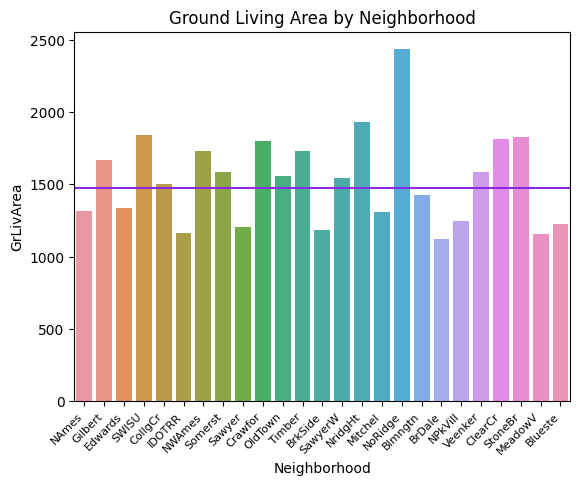

In [14]:
sns.barplot(data=train, x='Neighborhood', y='GrLivArea', errorbar=None)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.title("Ground Living Area by Neighborhood")
plt.axhline(y=train['GrLivArea'].median(), color='blueviolet')
plt.show()

According to the plot, the top three most expensive neighborhoods are Northridge, Northridge Heights, and Stone Brook. It's worth noting that Northridge also boasts the highest square footage of ground living area compared to other neighborhoods. This observation suggests that Northridge may indeed be considered a wealthy neighborhood, given both its high property prices and the spaciousness of its residences.

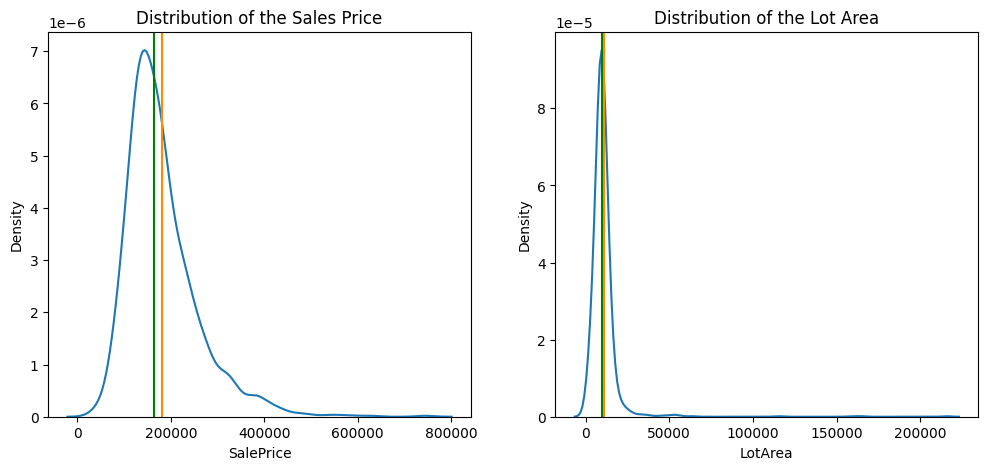

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.kdeplot(data=train, x='SalePrice',ax=axes[0])
axes[0].set_title("Distribution of the Sales Price")
axes[0].axvline(x=train['SalePrice'].mean(), color='darkorange')
axes[0].axvline(x=train['SalePrice'].median(), color='green')

sns.kdeplot(data=train, x='LotArea', ax=axes[1])
axes[1].set_title("Distribution of the Lot Area")
axes[1].axvline(x=train['LotArea'].mean(), color='darkorange')
axes[1].axvline(x=train['LotArea'].median(), color='green')

plt.show()

The distributions of both `SalePrice` and `LotArea` exhibit significant right-skewness, indicating the presence of a greater number of extreme values. To address this issue, we will need to apply transformations to these features in order to achieve a more normal distribution.

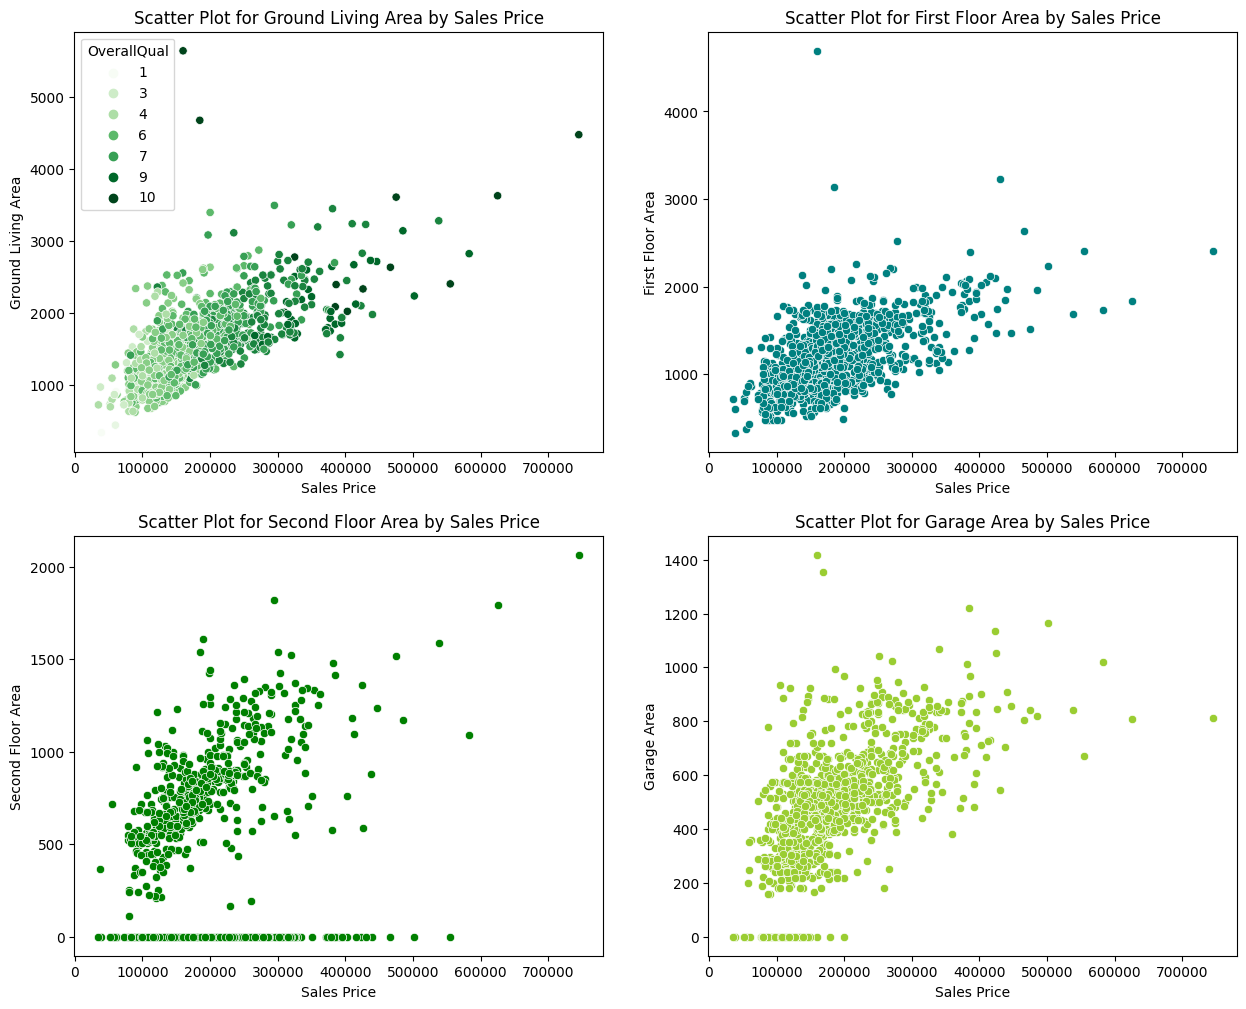

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(15,12))

sns.scatterplot(data=train, x='SalePrice', y='GrLivArea', palette='Greens', hue='OverallQual', ax=axes[0,0])
axes[0,0].set_title("Scatter Plot for Ground Living Area by Sales Price")
axes[0,0].set_xlabel("Sales Price")
axes[0,0].set_ylabel("Ground Living Area")

sns.scatterplot(data=train, x='SalePrice', y='1stFlrSF', color='teal', ax=axes[0,1])
axes[0,1].set_title("Scatter Plot for First Floor Area by Sales Price")
axes[0,1].set_xlabel("Sales Price")
axes[0,1].set_ylabel("First Floor Area")

sns.scatterplot(data=train, x='SalePrice', y='2ndFlrSF', color='green', ax=axes[1,0])
axes[1,0].set_title("Scatter Plot for Second Floor Area by Sales Price")
axes[1,0].set_xlabel("Sales Price")
axes[1,0].set_ylabel("Second Floor Area")

sns.scatterplot(data=train, x='SalePrice', y='GarageArea', color='yellowgreen', ax=axes[1,1])
axes[1,1].set_title("Scatter Plot for Garage Area by Sales Price")
axes[1,1].set_xlabel("Sales Price")
axes[1,1].set_ylabel("Garage Area")

plt.show()

In the initial scatter plot, we observe an outlier where the sales price is approximately 200K, yet the living area exceeds 4,000 square feet. The plot also illustrates a positive linear relationship between the sales price and the ground living area. We will further investigate this outlier using a box plot. Additionally, the plots reveal instances of houses without a second floor or a garage.

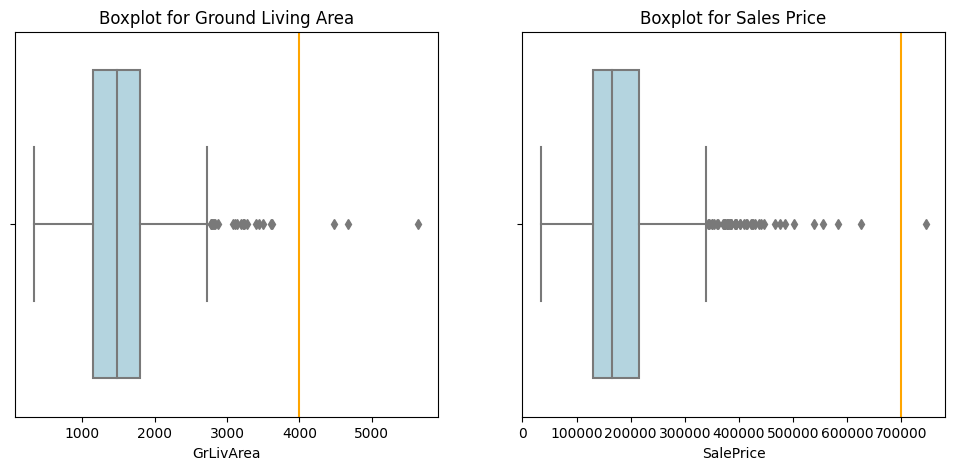

In [17]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.boxplot(x=train['GrLivArea'], ax=axes[0], color='lightblue')
axes[0].set_title("Boxplot for Ground Living Area")
axes[0].axvline(x=4000, color='orange')

sns.boxplot(x=train['SalePrice'], ax=axes[1], color='lightblue')
axes[1].set_title("Boxplot for Sales Price")
axes[1].axvline(x=700000, color='orange')

plt.show()

In the two box plots, there are multiple data points that appear as outliers. However, our focus will be on investigating two specific data points that exceed 4,000 square feet of ground living area and a distinct outlier where the house price exceeds 700K.

We will now turn our attention to the `LotArea` feature, given its notably high standard deviation.

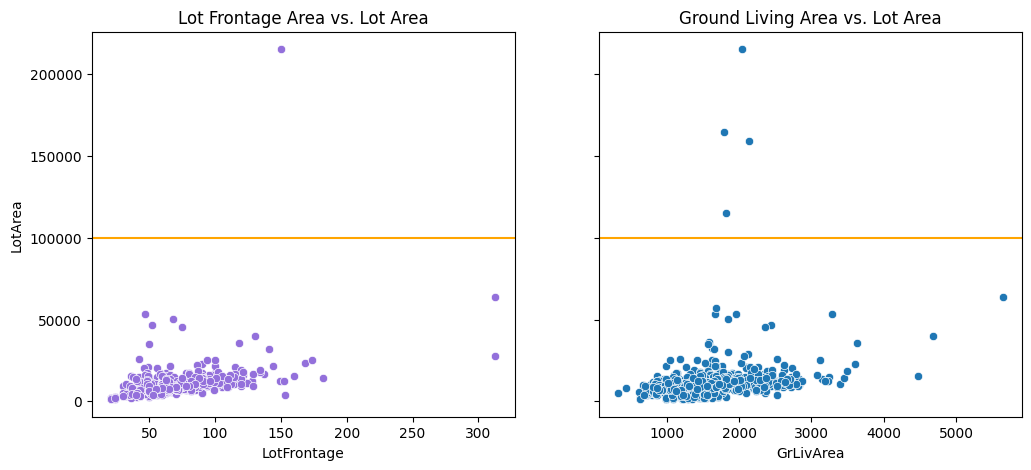

In [18]:
fig, axes = plt.subplots(1,2, figsize=(12,5), sharey=True)

sns.scatterplot(data=train, x='LotFrontage', y='LotArea', ax=axes[0], color='mediumpurple')
axes[0].set_title("Lot Frontage Area vs. Lot Area")
axes[0].axhline(y=100000, color='orange')

sns.scatterplot(data=train, x='GrLivArea', y='LotArea', ax=axes[1])
axes[1].set_title("Ground Living Area vs. Lot Area")
axes[1].axhline(y=100000, color='orange')

plt.show()

In the scatterplots presented above, we notice an outlier in the relationship between the lot area and the lot frontage. Additionally, in the second scatter plot, there are multiple data points where the ground living area is less than 3,000 square feet, yet the lot area is quite large. Since it is plausible for a property to have a substantial lot area with a relatively small house, we have opted to retain these data points as they are.

From our data visualization, we have identified key insights, including the months with the highest house sales, the top three most expensive neighborhoods, and the characteristics of outliers. The conditions for identifying these outliers are as follows:
- <font color='green'>Ground Living Area above 4,000 sqft.</font>
- <font color='green'>Sale Price above 700K.</font>
- <font color='green'>Lot Area above 200,000 sqft.</font>

Before proceeding with data imputation, we will take the necessary step of removing these outliers from the dataset.

# Data Preparations

## Outliers

In [19]:
outliers = train[(train['GrLivArea']>4000)|(train['SalePrice']>700000)|(train['LotArea']>100000)|(train['LotFrontage']>300)].index

In [20]:
train.drop(index=outliers, inplace=True)
train.reset_index(drop=True, inplace=True)

In [21]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1160.000000,946.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1154.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1096.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000
mean,56.827586,69.588795,10072.581034,6.110345,5.584483,1970.912069,1984.830172,102.428076,436.318966,44.630172,571.807759,1052.756897,1160.838793,350.108621,5.735345,1516.682759,0.419828,0.056897,1.572414,0.381897,2.887931,1.048276,6.547414,0.609483,1978.661496,1.778448,474.567241,95.192241,49.125862,21.989655,3.838793,15.513793,2.083621,50.586207,6.352586,2007.819828,180525.018103
std,42.456652,21.885296,5270.164744,1.356884,1.117637,30.729848,20.738637,170.724197,426.545683,157.059752,447.072464,407.966568,364.884679,435.940468,48.049745,495.189502,0.514286,0.235438,0.544735,0.500060,0.805198,0.226190,1.606016,0.636871,24.760689,0.740812,209.258395,128.563095,68.444833,62.270513,31.626662,56.058962,35.867373,554.448479,2.669095,1.325838,75350.756366
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7572.750000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,0.000000,223.000000,795.750000,886.500000,0.000000,0.000000,1144.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.750000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,50.000000,70.000000,9590.500000,6.000000,5.000000,1972.000000,1994.000000,0.000000,382.500000,0.000000,482.500000,994.000000,1092.000000,0.000000,0.000000,1470.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,164945.000000
75%,70.000000,80.000000,11640.000000,7.000000,6.000000,2001.000000,2004.000000,165.750000,716.000000,0.000000,811.000000,1289.250000,1391.250000,728.000000,0.000000,1787.250000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,182.000000,57200.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,1904.000000,1127.000000,2336.000000,3200.000000,3228.000000,1818.000000,572.000000,3627.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1356.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,625000.000000


## Drop Features
Drop the features that are missing more than 50% of the values.

In [22]:
def missing_half(df):
    missing_values_dict={}
    for column in df.columns:
        percentage_missing = (df[column].isna().sum()/len(df[column]))*100
        if percentage_missing > 50:
            missing_values_dict[column] = percentage_missing
    return pd.Series(missing_values_dict).sort_values(ascending=True)

In [23]:
missing_values_ft = missing_half(train).index
missing_values_ft

Index(['MasVnrType', 'Fence', 'Alley', 'MiscFeature', 'PoolQC'], dtype='object')

In [24]:
train.drop(columns=missing_values_ft, inplace=True)
train.reset_index(drop=True, inplace=True)
train.shape

(1160, 75)

## Data Imputation

In [25]:
def missing_values(df):
    missing_values_dict={}
    for column in df.columns:
        percentage_missing = (df[column].isna().sum()/len(df[column]))*100
        if percentage_missing > 0:
            missing_values_dict[column] = percentage_missing
    return pd.Series(missing_values_dict).sort_values(ascending=True)

In [26]:
missing_values(train).index

Index(['Electrical', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'LotFrontage',
       'FireplaceQu'],
      dtype='object')

### 1. Basement

In [27]:
basement = train[['BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF']]
basement.head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,TA,TA,No,Rec,922,Unf,0,392,1314
1,Gd,TA,No,Unf,0,Unf,0,799,799
2,Fa,TA,No,Unf,0,Unf,0,796,796
3,Gd,TA,No,ALQ,569,Unf,0,162,731
4,TA,TA,No,LwQ,218,Unf,0,808,1026


In [28]:
basement[basement['BsmtFinType2'].isna()]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
27,NaN,NaN,NaN,NaN,0,NaN,0,0,0
99,NaN,NaN,NaN,NaN,0,NaN,0,0,0
178,NaN,NaN,NaN,NaN,0,NaN,0,0,0
247,NaN,NaN,NaN,NaN,0,NaN,0,0,0
263,NaN,NaN,NaN,NaN,0,NaN,0,0,0
278,NaN,NaN,NaN,NaN,0,NaN,0,0,0
297,NaN,NaN,NaN,NaN,0,NaN,0,0,0
298,NaN,NaN,NaN,NaN,0,NaN,0,0,0
328,NaN,NaN,NaN,NaN,0,NaN,0,0,0
368,NaN,NaN,NaN,NaN,0,NaN,0,0,0


In [29]:
train.iloc[534]

MSSubClass           60
MSZoning             RL
LotFrontage       118.0
LotArea           35760
Street             Pave
                  ...  
MoSold                7
YrSold             2006
SaleType             WD
SaleCondition    Normal
SalePrice        625000
Name: 534, Length: 75, dtype: object

It appears that a considerable number of values are missing when `TotalBsmtSF` (Total Basement Square Footage) registers as zero. Hence, we'll replace these missing values with 'N/A,' indicating that it is not applicable due to the absence of a basement in the house.

In [30]:
# Checked the unique values using data dictionary, 'N/A' means no basement.
train['BsmtQual'] = np.where(((train['TotalBsmtSF']==0)&(train['BsmtQual'].isna())), 'N/A', train['BsmtQual'])
train['BsmtCond'] = np.where(((train['TotalBsmtSF']==0)&(train['BsmtCond'].isna())), 'N/A', train['BsmtCond'])
train['BsmtExposure'] = np.where(((train['TotalBsmtSF']==0)&(train['BsmtExposure'].isna())), 'N/A', train['BsmtExposure'])
train['BsmtFinType1'] = np.where(((train['TotalBsmtSF']==0)&(train['BsmtFinType1'].isna())), 'N/A', train['BsmtFinType1'])
train['BsmtFinType2'] = np.where(((train['TotalBsmtSF']==0)&(train['BsmtFinType2'].isna())), 'N/A', train['BsmtFinType2'])

### 2. Garage

In [31]:
garage = train[['GarageType', 'GarageYrBlt', 'GarageFinish','GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']]
garage.head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,1957.0,RFn,1,294,TA,TA
1,Attchd,1993.0,RFn,2,380,TA,TA
2,NaN,NaN,NaN,0,0,NaN,NaN
3,Detchd,1939.0,Unf,1,240,TA,TA
4,Detchd,1924.0,Unf,1,308,TA,TA


In [32]:
garage[garage['GarageType'].isna()]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
2,NaN,NaN,NaN,0,0,NaN,NaN
31,NaN,NaN,NaN,0,0,NaN,NaN
45,NaN,NaN,NaN,0,0,NaN,NaN
46,NaN,NaN,NaN,0,0,NaN,NaN
50,NaN,NaN,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...
1061,NaN,NaN,NaN,0,0,NaN,NaN
1106,NaN,NaN,NaN,0,0,NaN,NaN
1119,NaN,NaN,NaN,0,0,NaN,NaN
1133,NaN,NaN,NaN,0,0,NaN,NaN


Similar to basement features, garage-related attributes exhibit missing values when the garage area is zero. We will proceed to address these missing values in a manner akin to our approach for handling missing basement feature data.

In [33]:
# Fill in missing values following the data dictionary.
train['GarageType'] = np.where(((train['GarageArea']==0)&(train['GarageType'].isna())), 'N/A', train['GarageType'])
train['GarageYrBlt'] = np.where(((train['GarageArea']==0)&(train['GarageYrBlt'].isna())), 0, train['GarageYrBlt'])
train['GarageFinish'] = np.where(((train['GarageArea']==0)&(train['GarageFinish'].isna())), 'N/A', train['GarageFinish'])
train['GarageQual'] = np.where(((train['GarageArea']==0)&(train['GarageQual'].isna())), 'N/A', train['GarageQual'])
train['GarageCond'] = np.where(((train['GarageArea']==0)&(train['GarageCond'].isna())), 'N/A', train['GarageCond'])

### 3. Electrical, MasVnrArea, LotFrontage, FireplaceQu

In [34]:
fireplace = train[['Fireplaces','FireplaceQu']]
fireplace[fireplace['FireplaceQu'].isna()]

,Fireplaces,FireplaceQu
0,0,NaN
2,0,NaN
5,0,NaN
7,0,NaN
9,0,NaN
...,...,...
1149,0,NaN
1150,0,NaN
1151,0,NaN
1153,0,NaN


In [35]:
train['Electrical'].fillna(train['Electrical'].mode()[0], inplace=True)
train['FireplaceQu'].fillna('N/A', inplace=True)

Our strategy will involve addressing categorical features before turning our attention to numerical ones. Here are the specific steps for handling two categorical features:

* For `Electrical`, since there are no discernible patterns or information in the dataset to speculate missing values, we will opt to fill them with the mode.

* In the case of `FireplaceQu`, our analysis parallels the approach taken for basement and garage features. When there is no fireplace, there is a corresponding missing value for quality. To address this, we will fill in the missing values with 'NA,' indicating 'no fireplace.'

In [36]:
train['MasVnrArea'].nunique()

284

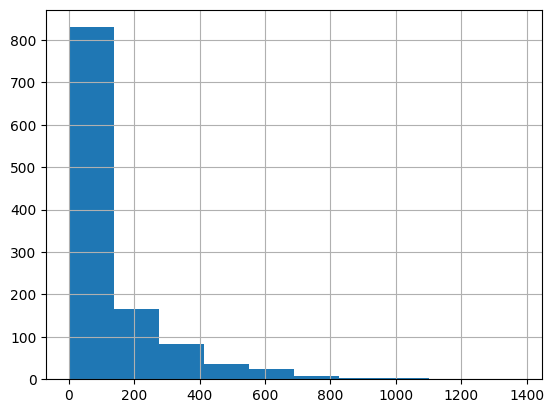

In [37]:
train['MasVnrArea'].hist();

In [38]:
train['MasVnrArea'].skew()

2.302332529739865

In [39]:
train['MasVnrArea'].describe()

count    1154.000000
mean      102.428076
std       170.724197
min         0.000000
25%         0.000000
50%         0.000000
75%       165.750000
max      1378.000000
Name: MasVnrArea, dtype: float64

In [40]:
median_masonary = train.groupby('Neighborhood')['MasVnrArea'].median()
median_msonary_dictionary = median_masonary.to_dict()
median_msonary_dictionary

{'Blmngtn': 16.0,
 'Blueste': 0.0,
 'BrDale': 285.0,
 'BrkSide': 0.0,
 'ClearCr': 0.0,
 'CollgCr': 83.0,
 'Crawfor': 0.0,
 'Edwards': 0.0,
 'Gilbert': 0.0,
 'IDOTRR': 0.0,
 'MeadowV': 0.0,
 'Mitchel': 0.0,
 'NAmes': 0.0,
 'NPkVill': 0.0,
 'NWAmes': 162.0,
 'NoRidge': 370.5,
 'NridgHt': 280.0,
 'OldTown': 0.0,
 'SWISU': 0.0,
 'Sawyer': 0.0,
 'SawyerW': 0.0,
 'Somerst': 0.0,
 'StoneBr': 0.0,
 'Timber': 108.0,
 'Veenker': 0.0}

There are 280 distinct values within the `MasVnrArea` feature, which is relatively small compared to the number of houses in the dataset. Therefore we can suspect that masonary area maybe related to the neighborhood. By referring to the provided data dictionary and grouping MasVnrArea by Neighborhood, we can discern that 'NoRidge', 'BrDale', and 'NridgHt' neighborhoods exhibit notably larger masonry areas.

It's worth noting that from our previous data visualizations, we already identified these 'NoRidge' and 'NridgHt' neighborhoods as part of the top three areas with substantial lot sizes and higher sales prices.

Both the histogram and the skewness analysis indicate that this feature does not follow a normal distribution. Instead, it exhibits positive skewness, with an extreme value of 1,600 sqft for the masonry area. Consequently, we will opt to use the median to fill in the missing values, given the skewed nature of the data.

In [42]:
train[train['MasVnrArea'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
24,20,RL,67.0,10083,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,N/A,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,0,8,2009,WD,Normal,184900
47,20,FV,95.0,11639,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,N/A,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,0,12,2008,New,Partial,182000
143,60,FV,65.0,8125,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,N/A,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,0,5,2008,WD,Normal,205950
166,60,RL,75.0,9473,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2,577,TA,TA,Y,0,211,0,0,0,0,0,3,2008,WD,Normal,237000
624,60,RL,NaN,7851,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,0,5,2010,WD,Normal,216500
692,120,FV,35.0,4274,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,N/A,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,0,11,2007,New,Partial,199900


In [43]:
train['MasVnrArea'] = train.apply(lambda row: median_msonary_dictionary.get(row['Neighborhood'], row['MasVnrArea']) if pd.isna(row['MasVnrArea']) else row['MasVnrArea'],axis=1)

In [44]:
train['LotFrontage'].nunique()

103

In [45]:
train['LotFrontage'].describe()

count    946.000000
mean      69.588795
std       21.885296
min       21.000000
25%       59.000000
50%       70.000000
75%       80.000000
max      182.000000
Name: LotFrontage, dtype: float64

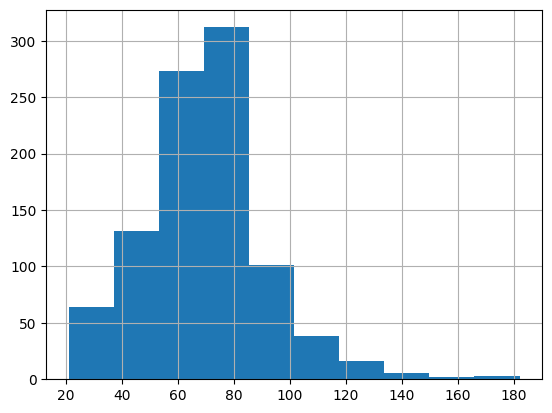

In [46]:
train['LotFrontage'].hist();

In [47]:
train['LotFrontage'].skew()

0.6295463751903198

In [48]:
train[train['LotFrontage'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
15,60,RL,NaN,8068,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1010,1010,GasA,Ex,Y,SBrkr,1010,1257,0,2267,0,0,2,1,4,1,Gd,8,Typ,1,TA,BuiltIn,2002.0,RFn,2,390,TA,TA,Y,120,46,0,0,0,0,0,12,2009,ConLI,Normal,200000
16,20,RL,NaN,21000,Pave,Reg,Bnk,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,5,1953,1953,Hip,CompShg,Wd Sdng,Wd Sdng,184.0,TA,Gd,CBlock,Gd,TA,Mn,ALQ,35,Rec,869,905,1809,GasA,TA,Y,SBrkr,2259,0,0,2259,1,0,2,0,3,1,Gd,7,Typ,2,Gd,Basment,1953.0,Unf,2,450,TA,TA,Y,166,120,192,0,0,0,0,10,2007,COD,Abnorml,217000
27,90,RL,NaN,8544,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,340.0,TA,TA,Slab,N/A,N/A,N/A,N/A,0,N/A,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,N/A,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,0,5,2006,WD,Normal,87500
29,20,RL,NaN,8544,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1966,2006,Gable,CompShg,HdBoard,HdBoard,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1228,1228,GasA,Gd,Y,SBrkr,1228,0,0,1228,0,0,1,1,3,1,Gd,6,Typ,0,N/A,Attchd,1966.0,Unf,1,271,TA,TA,Y,0,65,0,0,0,0,0,6,2008,WD,Normal,149350
33,20,RL,NaN,9991,Pave,IR1,Lvl,AllPub,Corner,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,4,4,1976,1993,Gable,CompShg,Plywood,Plywood,0.0,TA,TA,CBlock,TA,TA,No,BLQ,1116,Unf,0,165,1281,GasA,Ex,Y,SBrkr,1620,0,0,1620,1,0,2,0,3,1,TA,8,Min1,1,TA,Attchd,1993.0,Unf,2,490,TA,TA,Y,120,78,0,0,0,0,0,6,2009,WD,Normal,150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,160,FV,NaN,2651,Pave,Reg,Lvl,AllPub,FR2,Gtl,Somerst,Norm,Norm,Twnhs,2Story,7,5,2000,2000,Gable,CompShg,MetalSd,MetalSd,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,641,Unf,0,32,673,GasA,Ex,Y,SBrkr,673,709,0,1382,1,0,2,1,3,1,Gd,6,Typ,0,N/A,Detchd,2000.0,Unf,2,490,TA,TA,Y,153,50,0,0,0,0,0,4,2006,WD,Normal,165000
1129,80,RL,NaN,10970,Pave,IR1,Low,AllPub,Inside,Mod,CollgCr,Norm,Norm,1Fam,SLvl,6,6,1978,1978,Gable,CompShg,Plywood,HdBoard,0.0,TA,TA,CBlock,Gd,Gd,Gd,GLQ,505,LwQ,435,0,940,GasA,TA,Y,SBrkr,1026,0,0,1026,1,0,1,0,3,1,TA,5,Typ,0,N/A,Detchd,1981.0,Unf,2,576,TA,Fa,Y,0,0,34,0,0,0,0,10,2008,WD,Normal,147000
1134,50,RL,NaN,7015,Pave,IR1,Bnk,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,5,4,1950,1950,Gable,CompShg,MetalSd,MetalSd,161.0,TA,TA,CBlock,TA,TA,No,LwQ,185,Unf,0,524,709,GasA,TA,Y,SBrkr,979,224,0,1203,1,0,1,0,3,1,Gd,5,Typ,1,TA,Detchd,1950.0,Unf,1,352,TA,TA,Y,0,0,248,0,0,0,0,7,2009,WD,Normal,110000
1148,20,RL,NaN,57200,Pave,IR1,Bnk,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,5,5,1948,1950,Gable,CompShg,Wd Sdng,Wd Sdng,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,353,Rec,334,60,747,GasA,TA,Y,SBrkr,1687,0,0,1687,1,0,1,0,3,1,TA,7,Min1,2,TA,Detchd,1966.0,Unf,2,572,TA,TA,N,0,0,50,0,0,0,0,6,2010,WD,Normal,160000


In [49]:
median_lotfront = train.groupby('Neighborhood')['LotFrontage'].median()
median_lotfront_dictionary = median_lotfront.to_dict()
median_lotfront_dictionary

{'Blmngtn': 43.0,
 'Blueste': 24.0,
 'BrDale': 21.0,
 'BrkSide': 52.0,
 'ClearCr': 80.0,
 'CollgCr': 70.0,
 'Crawfor': 68.0,
 'Edwards': 65.5,
 'Gilbert': 65.0,
 'IDOTRR': 60.0,
 'MeadowV': 21.0,
 'Mitchel': 71.0,
 'NAmes': 74.0,
 'NPkVill': 24.0,
 'NWAmes': 80.0,
 'NoRidge': 90.0,
 'NridgHt': 91.5,
 'OldTown': 60.0,
 'SWISU': 60.0,
 'Sawyer': 70.5,
 'SawyerW': 66.0,
 'Somerst': 73.5,
 'StoneBr': 53.5,
 'Timber': 84.0,
 'Veenker': 68.0}

Within the `LotFrontage` feature, there are 102 unique values, which, like `MasVnrArea`, represents a relatively modest number of distinct values. Our approach will involve grouping by both `Neighborhood` and `LotFrontage` to determine the median, which we will use to fill in missing values. It's worth noting that, unlike `MasVnrArea`, the `LotFrontage` feature exhibits a distribution that is close to normal.

In [50]:
train['LotFrontage'] = train.apply(lambda row: median_lotfront_dictionary.get(row['Neighborhood'], row['LotFrontage']) if pd.isna(row['LotFrontage']) else row['LotFrontage'], axis=1)

In [51]:
# Now the dataframe is clean!
train.isna().sum().sum()

0

## Organizing Data

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160 entries, 0 to 1159
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1160 non-null   int64  
 1   MSZoning       1160 non-null   object 
 2   LotFrontage    1160 non-null   float64
 3   LotArea        1160 non-null   int64  
 4   Street         1160 non-null   object 
 5   LotShape       1160 non-null   object 
 6   LandContour    1160 non-null   object 
 7   Utilities      1160 non-null   object 
 8   LotConfig      1160 non-null   object 
 9   LandSlope      1160 non-null   object 
 10  Neighborhood   1160 non-null   object 
 11  Condition1     1160 non-null   object 
 12  Condition2     1160 non-null   object 
 13  BldgType       1160 non-null   object 
 14  HouseStyle     1160 non-null   object 
 15  OverallQual    1160 non-null   int64  
 16  OverallCond    1160 non-null   int64  
 17  YearBuilt      1160 non-null   int64  
 18  YearRemo

In [53]:
# MSSubClass type is integer but it is actually nominal categorical data type.
train['MSSubClass'] = train['MSSubClass'].astype('object')

#Change some features into binary.
train['GarageFinish'] = train['GarageFinish'].map(lambda x: 1 if x=='Fin' else 0)
train['CentralAir'] = train['CentralAir'].map(lambda x: 1 if x=='Y' else 0)
train['Functional'] = train['Functional'].map(lambda x: 1 if x=='Typ' else 0)
train['PavedDrive'] = train['PavedDrive'].map(lambda x: 1 if x=='Y' else 0)
train['Fireplaces'] = train['Fireplaces'].map(lambda x: 1 if x>0 else 0)
train['Street'] = train['Street'].map(lambda x: 1 if x=='Pave' else 0)
train['Utilities'] = train['Utilities'].map(lambda x: 1 if x=='AllPub' else 0)

In [54]:
quality_condition = train[['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                           'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']]
quality_condition.head()

,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond
0,5,6,TA,Gd,TA,TA,TA,TA,N/A,TA,TA
1,6,7,Gd,TA,Gd,TA,Gd,TA,TA,TA,TA
2,5,7,TA,TA,Fa,TA,Gd,TA,N/A,N/A,N/A
3,5,7,TA,TA,Gd,TA,Ex,Gd,TA,TA,TA
4,5,6,TA,TA,TA,TA,TA,Gd,Gd,TA,TA


In [55]:
qc_dictionary = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'N/A':0}
height_dictionary = {'Ex':100, 'Gd':90, 'TA':80, 'Fa':70, 'Po':60, 'N/A':0}

train['ExterQual'] = train['ExterQual'].replace(qc_dictionary)
train['ExterCond'] = train['ExterCond'].replace(qc_dictionary)
train['BsmtCond'] = train['BsmtCond'].replace(qc_dictionary)
train['HeatingQC'] = train['HeatingQC'].replace(qc_dictionary)
train['KitchenQual'] = train['KitchenQual'].replace(qc_dictionary)
train['FireplaceQu'] = train['FireplaceQu'].replace(qc_dictionary)
train['GarageQual'] = train['GarageQual'].replace(qc_dictionary)
train['GarageCond'] = train['GarageCond'].replace(qc_dictionary)

#Make a feature that is Basement Height instead of quality to prevent confusion.
train['BsmtHeight'] = train['BsmtQual'].replace(height_dictionary)
train.drop(columns='BsmtQual', inplace=True)

In [56]:
train['OverallQC'] = (train['OverallQual'] + train['OverallCond'])/2
train['ExteriorQC'] = (train['ExterQual'] + train['ExterCond'])/2
train['GarageQC'] = (train['GarageQual'] + train['GarageCond'])/2

train.drop(columns=['OverallQual','OverallCond','ExterQual','ExterCond','GarageQual','GarageCond'], inplace=True)

In [57]:
train['BsmtFinType1'].value_counts()

BsmtFinType1
Unf    345
GLQ    323
ALQ    176
BLQ    123
Rec    103
LwQ     62
N/A     28
Name: count, dtype: int64

In [58]:
train['BsmtFinType1'] = train['BsmtFinType1'].map(lambda x: 1 if x=='GLQ' else 1 if x=='ALQ' else 0)
train['BsmtFinType2'] = train['BsmtFinType2'].map(lambda x: 1 if x=='GLQ' else 1 if x=='ALQ' else 0)

train['BsmtFinish'] = train['BsmtFinType1'] + train['BsmtFinType2']

In [59]:
train['BsmtFinish'].value_counts()

BsmtFinish
0    640
1    514
2      6
Name: count, dtype: int64

In [60]:
train.drop(columns=['BsmtExposure','BsmtFinType1','BsmtFinType2'], inplace=True)

## Feature Engineering

In [61]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,Foundation,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,BsmtHeight,OverallQC,ExteriorQC,GarageQC,BsmtFinish
0,20,RL,70.0,8400,1,Reg,Lvl,1,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,1957,1957,Gable,CompShg,MetalSd,MetalSd,0.0,CBlock,3,922,0,392,1314,GasA,3,1,SBrkr,1314,0,0,1314,1,0,1,0,3,1,3,5,1,0,0,Attchd,1957.0,0,1,294,1,250,0,0,0,0,0,0,6,2010,WD,Normal,145000,80,5.5,3.5,3.0,0
1,60,RL,59.0,7837,1,IR1,Lvl,1,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,1993,1994,Gable,CompShg,VinylSd,VinylSd,0.0,PConc,3,0,0,799,799,GasA,4,1,SBrkr,799,772,0,1571,0,0,2,1,3,1,3,7,1,1,3,Attchd,1993.0,0,2,380,1,0,40,0,0,0,0,0,5,2009,WD,Normal,178000,90,6.5,3.5,3.0,0
2,30,RL,67.0,8777,1,Reg,Lvl,1,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,1910,1950,Gable,CompShg,MetalSd,Wd Sdng,0.0,CBlock,3,0,0,796,796,GasA,4,1,FuseA,796,0,0,796,0,0,1,0,2,1,3,4,1,0,0,N/A,0.0,0,0,0,0,328,0,164,0,0,0,0,5,2008,WD,Normal,85000,70,6.0,3.0,0.0,0
3,50,RL,60.0,7200,1,Reg,Lvl,1,Corner,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,252.0,BrkTil,3,569,0,162,731,GasA,5,1,SBrkr,981,787,0,1768,1,0,1,1,3,1,4,7,1,1,3,Detchd,1939.0,0,1,240,1,0,0,264,0,0,0,0,6,2007,WD,Normal,175000,90,6.0,3.0,3.0,1
4,50,RL,50.0,5000,1,Reg,Lvl,1,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,1924,1950,Gable,CompShg,BrkFace,Wd Sdng,0.0,BrkTil,3,218,0,808,1026,GasA,3,1,SBrkr,1026,665,0,1691,0,0,2,0,3,1,4,6,1,1,4,Detchd,1924.0,0,1,308,1,0,0,242,0,0,0,0,5,2010,WD,Normal,127000,80,5.5,3.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,20,RL,78.0,9317,1,IR1,Lvl,1,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,2006,2006,Gable,CompShg,VinylSd,VinylSd,0.0,PConc,3,24,0,1290,1314,GasA,4,1,SBrkr,1314,0,0,1314,0,0,2,0,3,1,4,6,1,1,4,Attchd,2006.0,0,2,440,1,0,22,0,0,0,0,0,3,2007,WD,Normal,176432,90,5.5,3.5,3.0,1
1156,50,RL,65.0,7804,1,Reg,Lvl,1,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,1928,1950,Gable,CompShg,WdShing,Plywood,0.0,BrkTil,3,622,0,500,1122,GasA,3,1,SBrkr,1328,653,0,1981,1,0,2,0,4,1,4,7,0,1,3,Detchd,1981.0,0,2,576,1,431,44,0,0,0,0,0,12,2009,WD,Normal,135000,80,3.5,3.0,3.0,0
1157,20,RL,60.0,8172,1,Reg,Lvl,1,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,1955,1990,Hip,CompShg,WdShing,Plywood,0.0,CBlock,3,167,0,697,864,GasA,3,1,SBrkr,864,0,0,864,1,0,1,0,2,1,3,5,1,0,0,Detchd,1957.0,0,2,572,0,0,0,0,0,0,0,0,4,2006,WD,Normal,115000,80,6.0,3.0,3.0,0
1158,50,RL,55.0,7642,1,Reg,Lvl,1,Corner,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,1918,1998,Gable,CompShg,Wd Sdng,Wd Sdng,0.0,BrkTil,3,0,0,912,912,GasA,4,1,SBrkr,912,514,0,1426,0,0,1,1,3,1,4,7,1,1,4,Detchd,1925.0,0,1,216,1,0,240,0,0,0,0,0,6,2007,WD,Normal,189950,80,7.5,3.5,3.0,0


In [62]:
# Total Porch Area
train['TotalPorchSF'] = train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch']

# Total Living Area
train['TotalLivSF'] = train['MasVnrArea'] + train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF'] + train['GarageArea'] + train['PoolArea'] + train['TotalPorchSF'] + train['WoodDeckSF']

# New Built House
train['NewHouse'] = train['SaleType'].map(lambda x: 1 if x=='New' else 0)

# Expensive Neighborhood
train['ExpNeighborhood'] = train['Neighborhood'].map(lambda x: 1 if x=='NoRidge' else 1 if x=='NridgHt' else 1 if x=='StoneBr' else 0)

# Basement and Ground Bathrooms
train['BsmtHalfBath'] = train['BsmtHalfBath'].map(lambda x: 0.5 if x==1 else 1 if x==2 else 0)
train['HalfBath'] = train['HalfBath'].map(lambda x: 0.5 if x==1 else 1 if x==2 else 0)

train['BsmtBaths'] = train['BsmtFullBath'] + train['BsmtHalfBath']
train['GrBaths'] = train['FullBath'] + train['HalfBath']

# Age of the House
train['HouseAge'] = train['YrSold'] - train['YearBuilt']

#Neighborhood Noise dB
condition = {'Norm':'Normal', 'Feedr':'Road', 'PosN':'Good', 'Artery':'Road', 'RRAe':'Railroad', 'RRNn':'Railroad', 'RRAn':'Railroad',
             'PosA':'Good', 'RRNe':'Railroad'}
train['Condition1'] = train['Condition1'].replace(condition)
train['Condition2'] = train['Condition2'].replace(condition)
train['NeighborCondition'] = train['Condition1'] + train['Condition2']

condition2 = {'NormalNormal':60, 'RoadNormal':75, 'GoodNormal':55, 'RoadRoad':80,'RailroadNormal':85,
 'RoadRailroad':100, 'RailroadRoad':100, 'GoodGood':50,'RoadGood':70}
train['NeighborNoise(dB)'] = train['NeighborCondition'].replace(condition2)

avgdB = train.groupby('Neighborhood')['NeighborNoise(dB)'].mean()
avg_dB_dict = avgdB.to_dict()

train['NeighborAvg_dB'] = train['Neighborhood'].replace(avg_dB_dict)
train['NeighborAvg_dB'] = round(train['NeighborAvg_dB'],2)

In [63]:
train.drop(columns=['MoSold','SaleType','SaleCondition','Condition1','Condition2','NeighborNoise(dB)','NeighborCondition','BsmtFullBath','BsmtHalfBath','YrSold','LotConfig','HalfBath'], inplace=True)

I've created several features based on insights gained from the dataset and its visualizations. Here's an overview of these newly generated features:

* `TotalPorchSF`: This feature aggregates the sizes of various porch types, accounting for houses with multiple porches.
* `TotalLivSF`: It represents the cumulative living area within a house that is usable by occupants.
* `NewHouse`: This feature indicates whether a house is newly built, as new houses tend to command higher prices, a pattern observed during data visualization.
* `ExpNeighborhood`: This is a flag feature used to identify neighborhoods with expensive houses.
* `BsmtBaths` and GrBaths: These features sum up the number of bathrooms, differentiating between those located in the basement and those on the ground floor.
* `HouseAge`: This feature quantifies the age of the house, providing insight into its relative newness or age.
* `NeighborAvg_db`: This feature represents an assessment of the average noise level (in decibels) within the neighborhood.

In [64]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,Neighborhood,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,Foundation,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,BsmtHeight,OverallQC,ExteriorQC,GarageQC,BsmtFinish,TotalPorchSF,TotalLivSF,NewHouse,ExpNeighborhood,BsmtBaths,GrBaths,HouseAge,NeighborAvg_dB
0,20,RL,70.0,8400,1,Reg,Lvl,1,Gtl,NAmes,1Fam,1Story,1957,1957,Gable,CompShg,MetalSd,MetalSd,0.0,CBlock,3,922,0,392,1314,GasA,3,1,SBrkr,1314,0,0,1314,1,3,1,3,5,1,0,0,Attchd,1957.0,0,1,294,1,250,0,0,0,0,0,0,145000,80,5.5,3.5,3.0,0,0,3172.0,0,0,1.0,1.0,53,61.94
1,60,RL,59.0,7837,1,IR1,Lvl,1,Gtl,Gilbert,1Fam,2Story,1993,1994,Gable,CompShg,VinylSd,VinylSd,0.0,PConc,3,0,0,799,799,GasA,4,1,SBrkr,799,772,0,1571,2,3,1,3,7,1,1,3,Attchd,1993.0,0,2,380,1,0,40,0,0,0,0,0,178000,90,6.5,3.5,3.0,0,40,2790.0,0,0,0.0,2.5,16,62.92
2,30,RL,67.0,8777,1,Reg,Lvl,1,Gtl,Edwards,1Fam,1Story,1910,1950,Gable,CompShg,MetalSd,Wd Sdng,0.0,CBlock,3,0,0,796,796,GasA,4,1,FuseA,796,0,0,796,1,2,1,3,4,1,0,0,N/A,0.0,0,0,0,0,328,0,164,0,0,0,0,85000,70,6.0,3.0,0.0,0,164,2084.0,0,0,0.0,1.0,98,61.94
3,50,RL,60.0,7200,1,Reg,Lvl,1,Gtl,SWISU,1Fam,1.5Fin,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,252.0,BrkTil,3,569,0,162,731,GasA,5,1,SBrkr,981,787,0,1768,1,3,1,4,7,1,1,3,Detchd,1939.0,0,1,240,1,0,0,264,0,0,0,0,175000,90,6.0,3.0,3.0,1,264,3255.0,0,0,1.0,1.5,70,63.57
4,50,RL,50.0,5000,1,Reg,Lvl,1,Gtl,SWISU,1Fam,1.5Fin,1924,1950,Gable,CompShg,BrkFace,Wd Sdng,0.0,BrkTil,3,218,0,808,1026,GasA,3,1,SBrkr,1026,665,0,1691,2,3,1,4,6,1,1,4,Detchd,1924.0,0,1,308,1,0,0,242,0,0,0,0,127000,80,5.5,3.0,3.0,0,242,3267.0,0,0,0.0,2.0,86,63.57


## OneHotEncoding for Categorical Features

In [65]:
categorical_ft = train[train.select_dtypes('object').columns]
categorical_ft.head()

,MSSubClass,MSZoning,LotShape,LandContour,LandSlope,Neighborhood,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,Foundation,Heating,Electrical,GarageType
0,20,RL,Reg,Lvl,Gtl,NAmes,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,CBlock,GasA,SBrkr,Attchd
1,60,RL,IR1,Lvl,Gtl,Gilbert,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,PConc,GasA,SBrkr,Attchd
2,30,RL,Reg,Lvl,Gtl,Edwards,1Fam,1Story,Gable,CompShg,MetalSd,Wd Sdng,CBlock,GasA,FuseA,N/A
3,50,RL,Reg,Lvl,Gtl,SWISU,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Wd Sdng,BrkTil,GasA,SBrkr,Detchd
4,50,RL,Reg,Lvl,Gtl,SWISU,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Sdng,BrkTil,GasA,SBrkr,Detchd


In [66]:
oneHot = ce.OneHotEncoder(use_cat_names=True)
oneHot.fit(categorical_ft)
encoded_train = oneHot.transform(categorical_ft)
encoded_train

,MSSubClass_20.0,MSSubClass_60.0,MSSubClass_30.0,MSSubClass_50.0,MSSubClass_85.0,MSSubClass_80.0,MSSubClass_45.0,MSSubClass_90.0,MSSubClass_160.0,MSSubClass_40.0,MSSubClass_190.0,MSSubClass_75.0,MSSubClass_120.0,MSSubClass_70.0,MSSubClass_180.0,MSZoning_RL,MSZoning_RM,MSZoning_FV,MSZoning_RH,MSZoning_C (all),LotShape_Reg,LotShape_IR1,LotShape_IR2,LotShape_IR3,LandContour_Lvl,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_NAmes,Neighborhood_Gilbert,Neighborhood_Edwards,Neighborhood_SWISU,Neighborhood_CollgCr,Neighborhood_IDOTRR,Neighborhood_NWAmes,Neighborhood_Somerst,Neighborhood_Sawyer,Neighborhood_Crawfor,Neighborhood_OldTown,Neighborhood_Timber,Neighborhood_BrkSide,Neighborhood_SawyerW,Neighborhood_NridgHt,Neighborhood_Mitchel,Neighborhood_NoRidge,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_NPkVill,Neighborhood_Veenker,Neighborhood_ClearCr,Neighborhood_StoneBr,Neighborhood_MeadowV,Neighborhood_Blueste,BldgType_1Fam,BldgType_Duplex,BldgType_TwnhsE,BldgType_2fmCon,BldgType_Twnhs,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_1.5Fin,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_1.5Unf,HouseStyle_2.5Unf,HouseStyle_2.5Fin,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Gambrel,RoofStyle_Flat,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_WdShngl,RoofMatl_WdShake,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_Roll,Exterior1st_MetalSd,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_Plywood,Exterior1st_HdBoard,Exterior1st_Stucco,Exterior1st_WdShing,Exterior1st_AsbShng,Exterior1st_ImStucc,Exterior1st_BrkComm,Exterior1st_CBlock,Exterior1st_AsphShn,Exterior1st_Stone,Exterior2nd_MetalSd,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_Plywood,Exterior2nd_HdBoard,Exterior2nd_Stucco,Exterior2nd_Wd Shng,Exterior2nd_AsbShng,Exterior2nd_ImStucc,Exterior2nd_BrkFace,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_Stone,Exterior2nd_Other,Exterior2nd_CBlock,Foundation_CBlock,Foundation_PConc,Foundation_BrkTil,Foundation_Slab,Foundation_Wood,Foundation_Stone,Heating_GasA,Heating_Grav,Heating_Wall,Heating_GasW,Heating_OthW,Heating_Floor,Electrical_SBrkr,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,GarageType_Attchd,GarageType_N/A,GarageType_Detchd,GarageType_BuiltIn,GarageType_Basment,GarageType_2Types,GarageType_CarPort
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [67]:
target_ft = train[['SalePrice']]
encoded_train_sub = encoded_train.join(target_ft)
encoded_train_sub

,MSSubClass_20.0,MSSubClass_60.0,MSSubClass_30.0,MSSubClass_50.0,MSSubClass_85.0,MSSubClass_80.0,MSSubClass_45.0,MSSubClass_90.0,MSSubClass_160.0,MSSubClass_40.0,MSSubClass_190.0,MSSubClass_75.0,MSSubClass_120.0,MSSubClass_70.0,MSSubClass_180.0,MSZoning_RL,MSZoning_RM,MSZoning_FV,MSZoning_RH,MSZoning_C (all),LotShape_Reg,LotShape_IR1,LotShape_IR2,LotShape_IR3,LandContour_Lvl,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_NAmes,Neighborhood_Gilbert,Neighborhood_Edwards,Neighborhood_SWISU,Neighborhood_CollgCr,Neighborhood_IDOTRR,Neighborhood_NWAmes,Neighborhood_Somerst,Neighborhood_Sawyer,Neighborhood_Crawfor,Neighborhood_OldTown,Neighborhood_Timber,Neighborhood_BrkSide,Neighborhood_SawyerW,Neighborhood_NridgHt,Neighborhood_Mitchel,Neighborhood_NoRidge,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_NPkVill,Neighborhood_Veenker,Neighborhood_ClearCr,Neighborhood_StoneBr,Neighborhood_MeadowV,Neighborhood_Blueste,BldgType_1Fam,BldgType_Duplex,BldgType_TwnhsE,BldgType_2fmCon,BldgType_Twnhs,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_1.5Fin,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_1.5Unf,HouseStyle_2.5Unf,HouseStyle_2.5Fin,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Gambrel,RoofStyle_Flat,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_WdShngl,RoofMatl_WdShake,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_Roll,Exterior1st_MetalSd,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_Plywood,Exterior1st_HdBoard,Exterior1st_Stucco,Exterior1st_WdShing,Exterior1st_AsbShng,Exterior1st_ImStucc,Exterior1st_BrkComm,Exterior1st_CBlock,Exterior1st_AsphShn,Exterior1st_Stone,Exterior2nd_MetalSd,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_Plywood,Exterior2nd_HdBoard,Exterior2nd_Stucco,Exterior2nd_Wd Shng,Exterior2nd_AsbShng,Exterior2nd_ImStucc,Exterior2nd_BrkFace,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_Stone,Exterior2nd_Other,Exterior2nd_CBlock,Foundation_CBlock,Foundation_PConc,Foundation_BrkTil,Foundation_Slab,Foundation_Wood,Foundation_Stone,Heating_GasA,Heating_Grav,Heating_Wall,Heating_GasW,Heating_OthW,Heating_Floor,Electrical_SBrkr,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,GarageType_Attchd,GarageType_N/A,GarageType_Detchd,GarageType_BuiltIn,GarageType_Basment,GarageType_2Types,GarageType_CarPort,SalePrice
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,145000
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,178000
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,85000
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,175000
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,127000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [68]:
encoded_corr = encoded_train_sub.corr()[['SalePrice']].reset_index().rename(columns={'index':'Feature', 'SalePrice':'Correlation'})
encoded_corr.head()

,Feature,Correlation
0,MSSubClass_20.0,0.040763
1,MSSubClass_60.0,0.379483
2,MSSubClass_30.0,-0.238565
3,MSSubClass_50.0,-0.175715
4,MSSubClass_85.0,-0.049207


In [69]:
selected_corr = encoded_corr[abs(encoded_corr['Correlation'])>0.1]
selected_ft = np.delete(selected_corr['Feature'].values, [-1]) #deletes the SalePrice

In [70]:
selected_encoded_df = encoded_train[selected_ft]
selected_encoded_df.head()

,MSSubClass_60.0,MSSubClass_30.0,MSSubClass_50.0,MSSubClass_90.0,MSSubClass_160.0,MSSubClass_190.0,MSZoning_RL,MSZoning_RM,MSZoning_FV,LotShape_Reg,LotShape_IR1,LotShape_IR2,LandContour_Bnk,LandContour_HLS,Neighborhood_NAmes,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_Somerst,Neighborhood_Sawyer,Neighborhood_OldTown,Neighborhood_Timber,Neighborhood_BrkSide,Neighborhood_NridgHt,Neighborhood_NoRidge,Neighborhood_BrDale,Neighborhood_StoneBr,BldgType_1Fam,BldgType_Duplex,BldgType_2fmCon,HouseStyle_2Story,HouseStyle_1.5Fin,RoofStyle_Gable,RoofStyle_Hip,RoofMatl_WdShngl,Exterior1st_MetalSd,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_AsbShng,Exterior2nd_MetalSd,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_CmentBd,Foundation_CBlock,Foundation_PConc,Foundation_BrkTil,Foundation_Slab,Heating_GasA,Electrical_SBrkr,Electrical_FuseA,Electrical_FuseF,GarageType_Attchd,GarageType_N/A,GarageType_Detchd,GarageType_BuiltIn
0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0
1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0
2,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0
3,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0
4,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0


In [71]:
selected_encoded_df.shape

(1160, 56)

Following the utilization of the OneHotEncoder, we employed the corr() method to assess the correlation between the `SalePrice` and the one-hot encoded features. Subsequently, we selected only those features with a correlation coefficient exceeding 0.1. As a result of this process, we now have 56 remaining features.

## Scale Numeric Features

In [72]:
train.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,Neighborhood,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,Foundation,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,BsmtHeight,OverallQC,ExteriorQC,GarageQC,BsmtFinish,TotalPorchSF,TotalLivSF,NewHouse,ExpNeighborhood,BsmtBaths,GrBaths,HouseAge,NeighborAvg_dB
0,20,RL,70.0,8400,1,Reg,Lvl,1,Gtl,NAmes,1Fam,1Story,1957,1957,Gable,CompShg,MetalSd,MetalSd,0.0,CBlock,3,922,0,392,1314,GasA,3,1,SBrkr,1314,0,0,1314,1,3,1,3,5,1,0,0,Attchd,1957.0,0,1,294,1,250,0,0,0,0,0,0,145000,80,5.5,3.5,3.0,0,0,3172.0,0,0,1.0,1.0,53,61.94
1,60,RL,59.0,7837,1,IR1,Lvl,1,Gtl,Gilbert,1Fam,2Story,1993,1994,Gable,CompShg,VinylSd,VinylSd,0.0,PConc,3,0,0,799,799,GasA,4,1,SBrkr,799,772,0,1571,2,3,1,3,7,1,1,3,Attchd,1993.0,0,2,380,1,0,40,0,0,0,0,0,178000,90,6.5,3.5,3.0,0,40,2790.0,0,0,0.0,2.5,16,62.92
2,30,RL,67.0,8777,1,Reg,Lvl,1,Gtl,Edwards,1Fam,1Story,1910,1950,Gable,CompShg,MetalSd,Wd Sdng,0.0,CBlock,3,0,0,796,796,GasA,4,1,FuseA,796,0,0,796,1,2,1,3,4,1,0,0,N/A,0.0,0,0,0,0,328,0,164,0,0,0,0,85000,70,6.0,3.0,0.0,0,164,2084.0,0,0,0.0,1.0,98,61.94
3,50,RL,60.0,7200,1,Reg,Lvl,1,Gtl,SWISU,1Fam,1.5Fin,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,252.0,BrkTil,3,569,0,162,731,GasA,5,1,SBrkr,981,787,0,1768,1,3,1,4,7,1,1,3,Detchd,1939.0,0,1,240,1,0,0,264,0,0,0,0,175000,90,6.0,3.0,3.0,1,264,3255.0,0,0,1.0,1.5,70,63.57
4,50,RL,50.0,5000,1,Reg,Lvl,1,Gtl,SWISU,1Fam,1.5Fin,1924,1950,Gable,CompShg,BrkFace,Wd Sdng,0.0,BrkTil,3,218,0,808,1026,GasA,3,1,SBrkr,1026,665,0,1691,2,3,1,4,6,1,1,4,Detchd,1924.0,0,1,308,1,0,0,242,0,0,0,0,127000,80,5.5,3.0,3.0,0,242,3267.0,0,0,0.0,2.0,86,63.57
5,20,RL,70.0,9800,1,Reg,Lvl,1,Gtl,CollgCr,1Fam,1Story,1972,1972,Gable,CompShg,VinylSd,VinylSd,0.0,PConc,3,894,0,0,894,GasA,3,1,SBrkr,894,0,0,894,1,3,1,3,5,1,0,0,Attchd,1975.0,0,2,552,1,256,0,0,0,0,0,0,149900,80,6.0,3.0,3.0,1,0,2596.0,0,0,1.0,1.0,34,59.91
6,60,RL,122.0,11911,1,IR2,Lvl,1,Gtl,Gilbert,1Fam,2Story,2005,2005,Gable,CompShg,VinylSd,VinylSd,0.0,PConc,3,0,0,684,684,GasA,5,1,SBrkr,684,876,0,1560,2,3,1,4,6,1,1,4,BuiltIn,2005.0,1,2,400,1,100,38,0,0,0,0,0,174000,90,5.5,3.5,3.0,0,38,2782.0,0,0,0.0,2.5,4,62.92
7,50,RM,40.0,5436,1,Reg,Lvl,1,Gtl,IDOTRR,1Fam,1.5Fin,1922,2007,Gable,CompShg,VinylSd,VinylSd,0.0,BrkTil,3,735,0,61,796,GasA,4,1,SBrkr,796,358,0,1154,1,3,1,4,7,1,0,0,Detchd,1922.0,0,1,240,0,0,96,0,0,0,0,0,125500,80,6.0,3.5,3.0,0,96,2286.0,0,0,1.0,1.0,88,63.85
8,20,RL,78.0,12090,1,IR1,Lvl,1,Gtl,NWAmes,1Fam,1Story,1981,1981,Gable,CompShg,MetalSd,MetalSd,210.0,CBlock,3,588,228,606,1422,GasA,3,1,SBrkr,1422,0,0,1422,2,3,1,4,7,1,1,3,Attchd,1981.0,1,2,576,1,276,0,0,0,0,0,0,175500,90,6.0,3.5,3.0,1,0,3906.0,0,0,0.0,2.0,27,62.73
9,20,RL,76.0,9158,1,Reg,Lvl,1,Gtl,Somerst,1Fam,1Story,2007,2007,Gable,CompShg,CemntBd,CmentBd,140.0,PConc,3,0,0,1496,1496,GasA,5,1,SBrkr,1496,0,0,1496,2,3,1,4,7,1,0,0,Attchd,2007.0,1,2,474,1,168,130,0,0,0,0,0,225000,90,6.5,3.5,3.0,0,130,3904.0,1,0,0.0,2.0,0,62.61


In [73]:
train[train.select_dtypes(['float', 'int']).columns].describe()

,LotFrontage,LotArea,Street,Utilities,YearBuilt,YearRemodAdd,MasVnrArea,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,BsmtHeight,OverallQC,ExteriorQC,GarageQC,BsmtFinish,TotalPorchSF,TotalLivSF,NewHouse,ExpNeighborhood,BsmtBaths,GrBaths,HouseAge,NeighborAvg_dB
count,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000
mean,69.759052,10072.581034,0.997414,0.999138,1970.912069,1984.830172,101.969828,2.939655,436.318966,44.630172,571.807759,1052.756897,4.125862,0.928448,1160.838793,350.108621,5.735345,1516.682759,1.572414,2.887931,1.048276,3.502586,6.547414,0.927586,0.528448,1.829310,1869.493966,0.241379,1.778448,474.567241,0.915517,95.192241,49.125862,21.989655,3.838793,15.513793,2.083621,50.586207,180525.018103,83.655172,5.847414,3.240086,2.815086,0.453448,90.468103,3327.985345,0.081897,0.097414,0.448276,1.763362,36.907759,62.116259
std,20.241337,5270.164744,0.050811,0.029361,30.729848,20.738637,170.414902,0.546205,426.545683,157.059752,447.072464,407.966568,0.966043,0.257855,364.884679,435.940468,48.049745,495.189502,0.544735,0.805198,0.226190,0.658123,1.606016,0.259284,0.499405,1.812668,452.596251,0.428104,0.740812,209.258395,0.278230,128.563095,68.444833,62.270513,31.626662,56.058962,35.867373,554.448479,75350.756366,14.777676,0.841643,0.340514,0.713838,0.508331,107.859105,1051.675819,0.274325,0.296648,0.511217,0.627795,30.756343,1.800495
min,21.000000,1300.000000,0.000000,0.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.840000
25%,60.000000,7572.750000,1.000000,1.000000,1953.000000,1966.000000,0.000000,3.000000,0.000000,0.000000,223.000000,795.750000,3.000000,1.000000,886.500000,0.000000,0.000000,1144.000000,1.000000,2.000000,1.000000,3.000000,5.000000,1.000000,0.000000,0.000000,1958.000000,0.000000,1.000000,338.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130000.000000,80.000000,5.500000,3.000000,3.000000,0.000000,0.000000,2579.250000,0.000000,0.000000,0.000000,1.000000,7.000000,60.000000
50%,70.000000,9590.500000,1.000000,1.000000,1972.000000,1994.000000,0.000000,3.000000,382.500000,0.000000,482.500000,994.000000,4.000000,1.000000,1092.000000,0.000000,0.000000,1470.000000,2.000000,3.000000,1.000000,3.000000,6.000000,1.000000,1.000000,2.000000,1978.000000,0.000000,2.000000,480.000000,1.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,164945.000000,90.000000,6.000000,3.000000,3.000000,0.000000,51.500000,3198.500000,0.000000,0.000000,0.000000,2.000000,35.000000,61.940000
75%,80.000000,11640.000000,1.000000,1.000000,2001.000000,2004.000000,164.250000,3.000000,716.000000,0.000000,811.000000,1289.250000,5.000000,1.000000,1391.250000,728.000000,0.000000,1787.250000,2.000000,3.000000,1.000000,4.000000,7.000000,1.000000,

In [74]:
binary_features = train[['Street', 'Utilities', 'CentralAir', 'Functional', 'Fireplaces', 'GarageFinish', 'PavedDrive', 'NewHouse', 'ExpNeighborhood', 'SalePrice']]
binary_features.corr()['SalePrice']

Street             0.028480
Utilities          0.016779
CentralAir         0.271874
Functional         0.123096
Fireplaces         0.474159
GarageFinish       0.418240
PavedDrive         0.231898
NewHouse           0.359898
ExpNeighborhood    0.564119
SalePrice          1.000000
Name: SalePrice, dtype: float64

In [75]:
# Drop the features that has less than 0.1 correlation
train.drop(columns=['Street', 'Utilities'], inplace=True)

In [76]:
non_scaled = train[['YearBuilt', 'YearRemodAdd', 'BsmtCond', 'HeatingQC', 'CentralAir', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
                    'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'PavedDrive', 'OverallQC', 'ExteriorQC', 'GarageQC',
                    'BsmtFinish', 'NewHouse', 'ExpNeighborhood', 'BsmtBaths', 'GrBaths']]
non_scaled.head(10)

,YearBuilt,YearRemodAdd,BsmtCond,HeatingQC,CentralAir,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,PavedDrive,OverallQC,ExteriorQC,GarageQC,BsmtFinish,NewHouse,ExpNeighborhood,BsmtBaths,GrBaths
0,1957,1957,3,3,1,1,3,1,3,1,0,0,1957.0,0,1,1,5.5,3.5,3.0,0,0,0,1.0,1.0
1,1993,1994,3,4,1,2,3,1,3,1,1,3,1993.0,0,2,1,6.5,3.5,3.0,0,0,0,0.0,2.5
2,1910,1950,3,4,1,1,2,1,3,1,0,0,0.0,0,0,0,6.0,3.0,0.0,0,0,0,0.0,1.0
3,1937,1950,3,5,1,1,3,1,4,1,1,3,1939.0,0,1,1,6.0,3.0,3.0,1,0,0,1.0,1.5
4,1924,1950,3,3,1,2,3,1,4,1,1,4,1924.0,0,1,1,5.5,3.0,3.0,0,0,0,0.0,2.0
5,1972,1972,3,3,1,1,3,1,3,1,0,0,1975.0,0,2,1,6.0,3.0,3.0,1,0,0,1.0,1.0
6,2005,2005,3,5,1,2,3,1,4,1,1,4,2005.0,1,2,1,5.5,3.5,3.0,0,0,0,0.0,2.5
7,1922,2007,3,4,1,1,3,1,4,1,0,0,1922.0,0,1,0,6.0,3.5,3.0,0,0,0,1.0,1.0
8,1981,1981,3,3,1,2,3,1,4,1,1,3,1981.0,1,2,1,6.0,3.5,3.0,1,0,0,0.0,2.0
9,2007,2007,3,5,1,2,3,1,4,1,0,0,2007.0,1,2,1,6.5,3.5,3.0,0,1,0,0.0,2.0


In [77]:
non_scaled.columns

Index(['YearBuilt', 'YearRemodAdd', 'BsmtCond', 'HeatingQC', 'CentralAir',
       'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'PavedDrive', 'OverallQC', 'ExteriorQC', 'GarageQC',
       'BsmtFinish', 'NewHouse', 'ExpNeighborhood', 'BsmtBaths', 'GrBaths'],
      dtype='object')

In [78]:
need_scale = train[train.select_dtypes(['float', 'int']).columns].drop(columns=non_scaled.columns)
need_scale.drop(columns='SalePrice', inplace=True)
need_scale.head(10)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,BsmtHeight,TotalPorchSF,TotalLivSF,HouseAge,NeighborAvg_dB
0,70.0,8400,0.0,922,0,392,1314,1314,0,0,1314,5,294,250,0,0,0,0,0,0,80,0,3172.0,53,61.94
1,59.0,7837,0.0,0,0,799,799,799,772,0,1571,7,380,0,40,0,0,0,0,0,90,40,2790.0,16,62.92
2,67.0,8777,0.0,0,0,796,796,796,0,0,796,4,0,328,0,164,0,0,0,0,70,164,2084.0,98,61.94
3,60.0,7200,252.0,569,0,162,731,981,787,0,1768,7,240,0,0,264,0,0,0,0,90,264,3255.0,70,63.57
4,50.0,5000,0.0,218,0,808,1026,1026,665,0,1691,6,308,0,0,242,0,0,0,0,80,242,3267.0,86,63.57
5,70.0,9800,0.0,894,0,0,894,894,0,0,894,5,552,256,0,0,0,0,0,0,80,0,2596.0,34,59.91
6,122.0,11911,0.0,0,0,684,684,684,876,0,1560,6,400,100,38,0,0,0,0,0,90,38,2782.0,4,62.92
7,40.0,5436,0.0,735,0,61,796,796,358,0,1154,7,240,0,96,0,0,0,0,0,80,96,2286.0,88,63.85
8,78.0,12090,210.0,588,228,606,1422,1422,0,0,1422,7,576,276,0,0,0,0,0,0,90,0,3906.0,27,62.73
9,76.0,9158,140.0,0,0,1496,1496,1496,0,0,1496,7,474,168,130,0,0,0,0,0,90,130,3904.0,0,62.61


In [79]:
std_SC = StandardScaler()
scaled_df = pd.DataFrame(std_SC.fit_transform(need_scale), columns=need_scale.columns)
scaled_df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,BsmtHeight,TotalPorchSF,TotalLivSF,HouseAge,NeighborAvg_dB
0,0.011909,-0.317505,-0.598620,1.139129,-0.284283,-0.402363,0.640630,0.419933,-0.803457,-0.119414,-0.409480,-0.963927,-0.863263,1.204658,-0.718053,-0.353283,-0.121431,-0.27686,-0.058117,-0.091276,-0.247451,-0.839124,-0.148385,0.523443,-0.097937
1,-0.531768,-0.424379,-0.598620,-1.023354,-0.284283,0.508397,-0.622272,-0.992080,0.968190,-0.119414,0.109737,0.281928,-0.452111,-0.740751,-0.133389,-0.353283,-0.121431,-0.27686,-0.058117,-0.091276,0.429537,-0.468109,-0.511771,-0.680080,0.446593
2,-0.136367,-0.245939,-0.598620,-1.023354,-0.284283,0.501684,-0.629629,-1.000306,-0.803457,-0.119414,-1.455995,-1.586854,-2.268831,1.811625,-0.718053,2.281523,-0.121431,-0.27686,-0.058117,-0.091276,-0.924439,0.682034,-1.183370,1.987187,-0.097937
3,-0.482343,-0.545300,0.880761,0.311194,-0.284283,-0.917043,-0.789025,-0.493077,1.002614,-0.119414,0.507736,0.281928,-1.121429,-0.740751,-0.718053,3.888112,-0.121431,-0.27686,-0.058117,-0.091276,0.429537,1.609570,-0.069429,1.076413,0.807760
4,-0.976594,-0.962924,-0.598620,-0.512051,-0.284283,0.528536,-0.065614,-0.369697,0.722638,-0.119414,0.352173,-0.340999,-0.796332,-0.740751,-0.718053,3.534662,-0.121431,-0.27686,-0.058117,-0.091276,-0.247451,1.405512,-0.058014,1.596855,0.807760


In [80]:
scaled_df.shape

(1160, 25)

Similarly, following the OneHot encoder step, we will eliminate features that exhibit a correlation coefficient lower than 0.1 with `SalePrice`. This process allows us to remove ineffective features, thus mitigating the risk of overfitting from an excessive number of features.

## Merge Dataframes

In [81]:
train_ready = selected_encoded_df.join(scaled_df)
train_ready = train_ready.join(non_scaled)
train_ready = train_ready.join(target_ft)
train_ready

,MSSubClass_60.0,MSSubClass_30.0,MSSubClass_50.0,MSSubClass_90.0,MSSubClass_160.0,MSSubClass_190.0,MSZoning_RL,MSZoning_RM,MSZoning_FV,LotShape_Reg,LotShape_IR1,LotShape_IR2,LandContour_Bnk,LandContour_HLS,Neighborhood_NAmes,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_Somerst,Neighborhood_Sawyer,Neighborhood_OldTown,Neighborhood_Timber,Neighborhood_BrkSide,Neighborhood_NridgHt,Neighborhood_NoRidge,Neighborhood_BrDale,Neighborhood_StoneBr,BldgType_1Fam,BldgType_Duplex,BldgType_2fmCon,HouseStyle_2Story,HouseStyle_1.5Fin,RoofStyle_Gable,RoofStyle_Hip,RoofMatl_WdShngl,Exterior1st_MetalSd,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_AsbShng,Exterior2nd_MetalSd,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_CmentBd,Foundation_CBlock,Foundation_PConc,Foundation_BrkTil,Foundation_Slab,Heating_GasA,Electrical_SBrkr,Electrical_FuseA,Electrical_FuseF,GarageType_Attchd,GarageType_N/A,GarageType_Detchd,GarageType_BuiltIn,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,BsmtHeight,TotalPorchSF,TotalLivSF,HouseAge,NeighborAvg_dB,YearBuilt,YearRemodAdd,BsmtCond,HeatingQC,CentralAir,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,PavedDrive,OverallQC,ExteriorQC,GarageQC,BsmtFinish,NewHouse,ExpNeighborhood,BsmtBaths,GrBaths,SalePrice
0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0.011909,-0.317505,-0.598620,1.139129,-0.284283,-0.402363,0.640630,0.419933,-0.803457,-0.119414,-0.409480,-0.963927,-0.863263,1.204658,-0.718053,-0.353283,-0.121431,-0.27686,-0.058117,-0.091276,-0.247451,-0.839124,-0.148385,0.523443,-0.097937,1957,1957,3,3,1,1,3,1,3,1,0,0,1957.0,0,1,1,5.5,3.5,3.0,0,0,0,1.0,1.0,145000
1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,-0.531768,-0.424379,-0.598620,-1.023354,-0.284283,0.508397,-0.622272,-0.992080,0.968190,-0.119414,0.109737,0.281928,-0.452111,-0.740751,-0.133389,-0.353283,-0.121431,-0.27686,-0.058117,-0.091276,0.429537,-0.468109,-0.511771,-0.680080,0.446593,1993,1994,3,4,1,2,3,1,3,1,1,3,1993.0,0,2,1,6.5,3.5,3.0,0,0,0,0.0,2.5,178000
2,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,-0.136367,-0.245939,-0.598620,-1.023354,-0.284283,0.501684,-0.629629,-1.000306,-0.803457,-0.119414,-1.455995,-1.586854,-2.268831,1.811625,-0.718053,2.281523,-0.121431,-0.27686,-0.058117,-0.091276,-0.924439,0.682034,-1.183370,1.987187,-0.097937,1910,1950,3,4,1,1,2,1,3,1,0,0,0.0,0,0,0,6.0,3.0,0.0,0,0,0,0.0,1.0,85000
3,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,-0.482343,-0.545300,0.880761,0.311194,-0.284283,-0.917043,-0.789025,-0.493077,1.002614,-0.119414,0.507736,0.281928,-1.121429,-0.740751,-0.718053,3.888112,-0.121431,-0.27686,-0.058117,-0.091276,0.429537,1.609570,-0.069429,1.076413,0.807760,1937,1950,3,5,1,1,3,1,4,1,1,3,1939.0,0,1,1,6.0,3.0,3.0,1,0,0,1.0,1.5,175000
4,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,-0.976594,-0.962924,-0.598620,-0.512051,-0.284283,0.528536,-0.065614,-0.369697,0.722638,-0.119414,0.352173,-0.340999,-0.796332,-0.740751,-0.718053,3.534662,-0.121431,-0.27686,-0.058117,-0.091276,-0.247451,1.405512,-0.058014,1.596855,0.807760,1924,1950,3,3,1,2,3,1,4,1,1,4,1924.0,0,1,1,5.5,3.0,3.0,0,0,0,0.0,2.0,127000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

## Transform Target Feature
- Transforming the target feature to approximate a normal distribution, which is typically beneficial for regression models.

In [82]:
train['SalePrice'].skew()

1.5466362757880852

In [83]:
np.log(train['SalePrice']).skew()

0.09309120004009368

In [84]:
train_ready['SalePrice_trans'] = np.log(train['SalePrice'])
train_ready.head()

,MSSubClass_60.0,MSSubClass_30.0,MSSubClass_50.0,MSSubClass_90.0,MSSubClass_160.0,MSSubClass_190.0,MSZoning_RL,MSZoning_RM,MSZoning_FV,LotShape_Reg,LotShape_IR1,LotShape_IR2,LandContour_Bnk,LandContour_HLS,Neighborhood_NAmes,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_Somerst,Neighborhood_Sawyer,Neighborhood_OldTown,Neighborhood_Timber,Neighborhood_BrkSide,Neighborhood_NridgHt,Neighborhood_NoRidge,Neighborhood_BrDale,Neighborhood_StoneBr,BldgType_1Fam,BldgType_Duplex,BldgType_2fmCon,HouseStyle_2Story,HouseStyle_1.5Fin,RoofStyle_Gable,RoofStyle_Hip,RoofMatl_WdShngl,Exterior1st_MetalSd,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_AsbShng,Exterior2nd_MetalSd,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_CmentBd,Foundation_CBlock,Foundation_PConc,Foundation_BrkTil,Foundation_Slab,Heating_GasA,Electrical_SBrkr,Electrical_FuseA,Electrical_FuseF,GarageType_Attchd,GarageType_N/A,GarageType_Detchd,GarageType_BuiltIn,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,BsmtHeight,TotalPorchSF,TotalLivSF,HouseAge,NeighborAvg_dB,YearBuilt,YearRemodAdd,BsmtCond,HeatingQC,CentralAir,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,PavedDrive,OverallQC,ExteriorQC,GarageQC,BsmtFinish,NewHouse,ExpNeighborhood,BsmtBaths,GrBaths,SalePrice,SalePrice_trans
0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0.011909,-0.317505,-0.598620,1.139129,-0.284283,-0.402363,0.640630,0.419933,-0.803457,-0.119414,-0.409480,-0.963927,-0.863263,1.204658,-0.718053,-0.353283,-0.121431,-0.27686,-0.058117,-0.091276,-0.247451,-0.839124,-0.148385,0.523443,-0.097937,1957,1957,3,3,1,1,3,1,3,1,0,0,1957.0,0,1,1,5.5,3.5,3.0,0,0,0,1.0,1.0,145000,11.884489
1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,-0.531768,-0.424379,-0.598620,-1.023354,-0.284283,0.508397,-0.622272,-0.992080,0.968190,-0.119414,0.109737,0.281928,-0.452111,-0.740751,-0.133389,-0.353283,-0.121431,-0.27686,-0.058117,-0.091276,0.429537,-0.468109,-0.511771,-0.680080,0.446593,1993,1994,3,4,1,2,3,1,3,1,1,3,1993.0,0,2,1,6.5,3.5,3.0,0,0,0,0.0,2.5,178000,12.089539
2,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,-0.136367,-0.245939,-0.598620,-1.023354,-0.284283,0.501684,-0.629629,-1.000306,-0.803457,-0.119414,-1.455995,-1.586854,-2.268831,1.811625,-0.718053,2.281523,-0.121431,-0.27686,-0.058117,-0.091276,-0.924439,0.682034,-1.183370,1.987187,-0.097937,1910,1950,3,4,1,1,2,1,3,1,0,0,0.0,0,0,0,6.0,3.0,0.0,0,0,0,0.0,1.0,85000,11.350407
3,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,-0.482343,-0.545300,0.880761,0.311194,-0.284283,-0.917043,-0.789025,-0.493077,1.002614,-0.119414,0.507736,0.281928,-1.121429,-0.740751,-0.718053,3.888112,-0.121431,-0.27686,-0.058117,-0.091276,0.429537,1.609570,-0.069429,1.076413,0.807760,1937,1950,3,5,1,1,3,1,4,1,1,3,1939.0,0,1,1,6.0,3.0,3.0,1,0,0,1.0,1.5,175000,12.072541
4,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,-0.976594,-0.962924,-0.598620,-0.512051,-0.284283,0.528536,-0.065614,-0.369697,0.722638,-0.119414,0.352173,-0.340999,-0.796332,-0.740751,-0.718053,3.534662,-0.121431,-0.27686,-0.058117,-0.091276,-0.247451,1.405512,-0.058014,1.596855,0.807760,1924,1950,3,3,1,2,3,1,4,1,1,4,1924.0,0,1,1,5.5,3.0,3.0,0,0,0,0.0,2.0,127000,11.751942


We will proceed to transform our target feature, `SalePrice`, in order to achieve a distribution closer to normal. Initially, the skewness of the target feature was approximately 1.55. To rectify this, we applied a logarithmic transformation using NumPy, resulting in a significantly reduced skewness of 0.093 in the target feature distribution.

# Model Training

In [85]:
x = train_ready.drop(columns=['SalePrice', 'SalePrice_trans'])
y = train_ready['SalePrice_trans']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [86]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((928, 105), (232, 105), (928,), (232,))

In [87]:
lr = LinearRegression()
en = ElasticNet(alpha = 0.001, l1_ratio=0.99)
gbr = GradientBoostingRegressor(n_estimators=500)
xgbr = xgb.XGBRegressor(n_estimators=2900, max_depth=2, learning_rate=0.01)

lr.fit(x_train, y_train)
en.fit(x_train, y_train)
gbr.fit(x_train, y_train)
xgbr.fit(x_train, y_train)

lr_pred = lr.predict(x_test)
en_pred = en.predict(x_test)
gbr_pred = gbr.predict(x_test)
xgbr_pred = xgbr.predict(x_test)

In [88]:
pd.DataFrame({
    'Linear': {'RMSE':mean_squared_error(np.exp(y_test), np.exp(lr_pred)) ** .5},
    "ElasticNet": {'RMSE':mean_squared_error(np.exp(y_test), np.exp(en_pred)) ** .5},
    'GradientBoost': {'RMSE':mean_squared_error(np.exp(y_test), np.exp(gbr_pred)) ** .5},
    "XGBoost": {'RMSE':mean_squared_error(np.exp(y_test), np.exp(xgbr_pred)) ** .5},
    })

,Linear,ElasticNet,GradientBoost,XGBoost
RMSE,20374.707436,19422.649907,19768.549996,19714.367135


In [89]:
print('Linear RMSE:',mean_squared_error(np.exp(y_test), np.exp(lr_pred)) ** .5)
print('ElasticNet RMSE:',mean_squared_error(np.exp(y_test), np.exp(en_pred)) ** .5)
print('GradientBoost RMSE:',mean_squared_error(np.exp(y_test), np.exp(gbr_pred)) ** .5)
print('XGBoost RMSE:',mean_squared_error(np.exp(y_test), np.exp(xgbr_pred)) ** .5)

Linear RMSE: 20374.707435654032
ElasticNet RMSE: 19422.64990715752
GradientBoost RMSE: 19768.54999621048
XGBoost RMSE: 19714.36713451379


In [90]:
weighted_pred = en_pred * 0.5 + gbr_pred * 0.2 + xgbr_pred * 0.3
y_test_inv = np.exp(y_test)
print('Weighted RMSE:',mean_squared_error(y_test_inv, np.exp(weighted_pred)) ** .5)

Weighted RMSE: 18488.547514226906


I opted to utilize the root mean squared error (RMSE) for model evaluation, given its widespread use as an evaluation metric in regression models. RMSE, being in the same unit as the target variable, offers straightforward interpretability, enhancing our understanding of prediction errors. It provides a comprehensive assessment of the model's predictive performance in regression tasks by capturing the average magnitude of prediction errors. Moreover, RMSE serves as a valuable tool for model selection and enhancement.

# Summary

After initial model development, the root mean square error (RMSE) of our model stood at approximately 20K. Through a process of model blending, we managed to refine the predictions, achieving a weighted RMSE of around 18K. To ensure the model's generalizability, our next step involves rigorous validation testing on a separate dataset. This validation check will help ascertain the model's performance beyond the training data.

In the pursuit of a comprehensive workflow, I crafted a 'houseprice_package.py' file, streamlining the training pipeline and expediting future work on the test dataset. The approach for the validation dataset mimics the thorough process employed with the training data. Conversely, for the test dataset, I intend to utilize the custom package I've created, ensuring consistency and efficiency in the prediction process.

While parameter tuning remains an option for enhancing model performance, an even more promising avenue lies in expanding feature engineering efforts. Iterating on feature creation and selection could significantly augment the model's predictive capabilities and overall accuracy.